In [7]:
import pandas as pd

# Load the CSV files
neighbourhoods_df = pd.read_csv('D:\\UCL\\dissertation/London_Neighbourhoods_updated.csv')
london_data_df = pd.read_csv('D:\\UCL\\dissertation\\safeguarded-release-Zoopla-2018-19_17042024\\zoopla-data-gen2-rent-valid-property-id-year-2018.csv/london_data.csv')

# Display the first few rows of each dataframe to understand their structure
neighbourhoods_df.head(), london_data_df.head()


(      Location                  London borough       Post town  \
 0   Abbey Wood               Bexley, Greenwich          LONDON   
 1        Acton  Ealing, Hammersmith and Fulham          LONDON   
 2    Addington                         Croydon         CROYDON   
 3   Addiscombe                         Croydon         CROYDON   
 4  Albany Park                          Bexley  BEXLEY, SIDCUP   
 
   Postcode district Dial code OS grid ref In inner london  
 0               SE2        20    TQ465785             Yes  
 1            W3, W4        20    TQ205805             Yes  
 2               CR0        20    TQ375645              No  
 3               CR0        20    TQ345665              No  
 4         DA5, DA14        20    TQ478728              No  ,
    listing_id  branch_id                                    agent_address  \
 0    45557963  ["56666"]                  ["247 Croydon Road, Beckenham"]   
 1    50075058  ["21927"]  ["500 Northholt Road, South Harrow, Middlesex"

In [8]:
import re

# Extract neighbourhoods from the Location column
neighbourhoods = neighbourhoods_df['Location'].tolist()

# Function to perform CRF-like labeling for location names in the short_description
def label_neighbourhoods(description, neighbourhoods):
    labels = []
    for neighbourhood in neighbourhoods:
        if re.search(r'\b' + re.escape(neighbourhood) + r'\b', description, re.IGNORECASE):
            labels.append(neighbourhood)
    return labels

# Apply the labeling function to the short_description column
london_data_df['auto_labels'] = london_data_df['short_description'].apply(lambda x: label_neighbourhoods(x, neighbourhoods))

# Show the first few rows to see the results
london_data_df[['short_description', 'auto_labels']].head(10)


,short_description,auto_labels
0,Available mid December we are delighted to o...,"[Beckenham, Bromley, Hayes, Hayes, West Wickham]"
1,Alexandra park is pleased to offer this two be...,[]
2,"Spacious 600sq ft one bedroom, fourth floor fu...",[]
3,Good Size Three Bedroom Flat Located on Mare S...,"[Hackney, Hackney Central, Stratford]"
4,Winner Best Letting Agent. The estas 2018. Set...,[Highbury]
5,Msk Properties are pleased to present this ver...,[Kenton]
6,This 2 Bedroom Top Floor Flat (2nd Floor) is i...,[]
7,The property is in a perfect location only a 2...,"[Highbury, Islington]"
8,A beautifully presented two double bedroom apa...,[Mayfair]
9,Woolwhich SE18. Immaculately presented 4 bedro...,[Plumstead]


In [9]:
# Extract the first 150 rows for manual labeling
manual_labels_sample = london_data_df[['short_description', 'auto_labels']].head(150)

# Displaying the data for potential manual labeling (in practice, you would manually verify these labels)
manual_labels_sample.head(10)


,short_description,auto_labels
0,Available mid December we are delighted to o...,"[Beckenham, Bromley, Hayes, Hayes, West Wickham]"
1,Alexandra park is pleased to offer this two be...,[]
2,"Spacious 600sq ft one bedroom, fourth floor fu...",[]
3,Good Size Three Bedroom Flat Located on Mare S...,"[Hackney, Hackney Central, Stratford]"
4,Winner Best Letting Agent. The estas 2018. Set...,[Highbury]
5,Msk Properties are pleased to present this ver...,[Kenton]
6,This 2 Bedroom Top Floor Flat (2nd Floor) is i...,[]
7,The property is in a perfect location only a 2...,"[Highbury, Islington]"
8,A beautifully presented two double bedroom apa...,[Mayfair]
9,Woolwhich SE18. Immaculately presented 4 bedro...,[Plumstead]


In [10]:
# Load the manually labeled data
manual_labels_df = pd.read_csv('D:\\UCL\\dissertation\\london_data_with_tags_150.csv')

# Display the first few rows to understand its structure
manual_labels_df.head()


,listing_id,branch_id,agent_address,agent_postcode,short_description,property_id,property_type,address,price_min,price_max,latitude,longitude,lad20cd,lad20nm,tagged_description
0,45557963,"[""56666""]","[""247 Croydon Road, Beckenham""]","[""BR3 3PS""]",Available mid December we are delighted to o...,2530504,Terraced house,"[""Pickhurst Rise, West Wickham BR4""]",369,392,51.381640,0.002037,E09000006,Bromley,"[('Available', 'O'), ('mid', 'O'), ('December'..."
1,50075058,"[""21927""]","[""500 Northholt Road, South Harrow, Middlesex""]","[""HA2 8HA""]",Alexandra park is pleased to offer this two be...,24903079,Semi-detached house,"[""Willow Tree Lane, Hayes, Middlesex UB4""]",346,346,51.526997,-0.395739,E09000017,Hillingdon,"[('Alexandra', 'B-LOC'), ('park', 'O'), ('is',..."
2,48409295,"[""21346""]","[""123 Stamford Street, London""]","[""SE1 9NN""]","Spacious 600sq ft one bedroom, fourth floor fu...",20874104,Flat,"[""Whitehouse Apartments, 9 Belvedere Road, Lon...",460,470,51.505480,-0.114849,E09000022,Lambeth,"[('Spacious', 'O'), ('600sq', 'O'), ('ft', 'O'..."
3,48181544,"[""41955""]","[""4 Stoke Newington High Street, London""]","[""N16 7PL""]",Good Size Three Bedroom Flat Located on Mare S...,27295909,Flat,"[""Mare Street, Hackney E8""]",369,369,51.548477,-0.055336,E09000012,Hackney,"[('Good', 'O'), ('Size', 'O'), ('Three', 'O'),..."
4,44706594,"[""39958""]","[""296 Old Brompton Road, London""]","[""SW5 9JF""]",Winner Best Letting Agent. The estas 2018. Set...,28869070,Flat,"[""South Stand, Highbury Stadium Square, Isling...",415,415,51.556732,-0.102127,E09000019,Islington,"[('Winner', 'O'), ('Best', 'O'), ('Letting', '..."


In [11]:
# Function to extract manually tagged locations from the tagged_description
def extract_manual_labels(tagged_description):
    return [word for word, tag in eval(tagged_description) if 'LOC' in tag]

# Apply the function to extract manual labels
manual_labels_df['manual_labels'] = manual_labels_df['tagged_description'].apply(extract_manual_labels)

# Merge the auto and manual labels for comparison
comparison_df = manual_labels_df[['short_description', 'manual_labels']].merge(
    london_data_df[['short_description', 'auto_labels']].head(150),
    on='short_description'
)

# Function to calculate accuracy
def calculate_accuracy(row):
    return set(row['manual_labels']) == set(row['auto_labels'])

# Calculate accuracy for each row
comparison_df['is_correct'] = comparison_df.apply(calculate_accuracy, axis=1)

# Calculate overall accuracy
accuracy = comparison_df['is_correct'].mean()

comparison_df[['short_description', 'manual_labels', 'auto_labels', 'is_correct']].head(10), accuracy


(                                   short_description  \
 0    Available mid December we are delighted to o...   
 1  Alexandra park is pleased to offer this two be...   
 2  Spacious 600sq ft one bedroom, fourth floor fu...   
 3  Good Size Three Bedroom Flat Located on Mare S...   
 4  Winner Best Letting Agent. The estas 2018. Set...   
 5  Msk Properties are pleased to present this ver...   
 6  This 2 Bedroom Top Floor Flat (2nd Floor) is i...   
 7  The property is in a perfect location only a 2...   
 8  A beautifully presented two double bedroom apa...   
 9  Woolwhich SE18. Immaculately presented 4 bedro...   
 
                                        manual_labels  \
 0  [Langley, Hayes, West, Wickham,, Hayes,, Becke...   
 1                                        [Alexandra]   
 2                                       [Whitehouse]   
 3  [Mare, Street,, Hackney, Central, Hackney, Str...   
 4                                         [Highbury]   
 5                           

D:\python\ANACONDA\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
D:\temp\ipykernel_15876\767635361.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


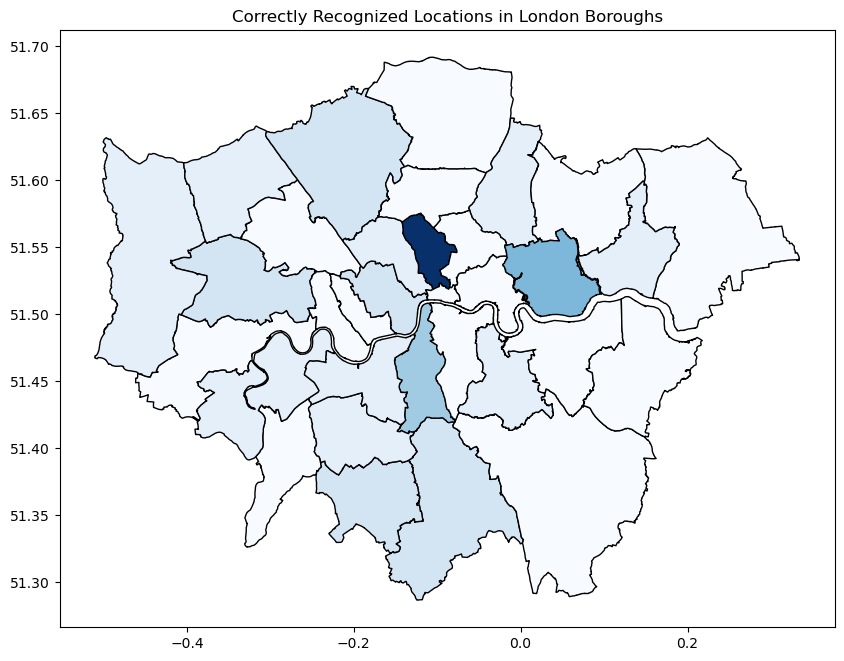

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from matplotlib import cm
from matplotlib.colors import Normalize

correct_locations = comparison_df[comparison_df['is_correct'] == True]['auto_labels'].explode()

# 将地名频次汇总
location_counts = correct_locations.value_counts().reset_index()
location_counts.columns = ['location', 'count']

# 地理编码
geolocator = Nominatim(user_agent="geoapiExercises")
location_points = []

for location, count in location_counts.values:
    try:
        loc = geolocator.geocode(location + ", London")
        if loc:
            location_points.append({
                'location': location,
                'latitude': loc.latitude,
                'longitude': loc.longitude,
                'count': count
            })
    except Exception as e:
        print(f"Could not geocode location {location}: {e}")

locations_gdf = gpd.GeoDataFrame(
    location_points, 
    geometry=gpd.points_from_xy([loc['longitude'] for loc in location_points], [loc['latitude'] for loc in location_points]),
    crs="EPSG:4326"
)

# 加载Borough Shapefile
shapefile_path = 'D:\\UCL\\dissertation/London_Borough_Excluding_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 确认Shapefile的坐标系
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# 将地名映射到Borough
borough_counts = gpd.sjoin(locations_gdf, gdf, how="left", op="within")
borough_counts = borough_counts.groupby("NAME").agg({"count": "sum"}).reset_index()

# 将计数值合并到原始的Borough GeoDataFrame中
gdf = gdf.merge(borough_counts, how="left", left_on="NAME", right_on="NAME")
gdf['count'] = gdf['count'].fillna(0)  # 将NaN值替换为0

# 设置颜色映射
norm = Normalize(vmin=gdf['count'].min(), vmax=gdf['count'].max())
cmap = cm.get_cmap('Blues')

# 绘制Borough区域并根据频次染色
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor='black')

plt.title("Correctly Recognized Locations in London Boroughs")
plt.show()


In [13]:
# Initialize lists to collect precision, recall, and F1 scores for each record
precision_list = []
recall_list = []
f1_list = []

for _, row in comparison_df.iterrows():
    auto_set = set(row['auto_labels'])
    manual_set = set(row['manual_labels'])
    
    # Calculate true positives, false positives, and false negatives for each record
    true_positive = len(auto_set & manual_set)
    false_positive = len(auto_set - manual_set)
    false_negative = len(manual_set - auto_set)
    
    # Calculate precision, recall, and F1 score for this record
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Append the results to the lists
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Calculate the mean of each metric across all records
mean_precision = sum(precision_list) / len(precision_list)
mean_recall = sum(recall_list) / len(recall_list)
mean_f1 = sum(f1_list) / len(f1_list)

mean_precision, mean_recall, mean_f1


(0.3166666666666667, 0.2702210884353741, 0.28200113378684805)

In [ ]:
#
#Findings
#In this study, we focused on evaluating the effectiveness of a basic string matching approach for identifying geographical locations within real estate descriptions. We compared the automatic tagging results against a manually annotated dataset of 150 entries, with the goal of understanding how well the automatic method performs in identifying place names. The key performance metrics analyzed were precision, recall, and F1 score.

#The precision of the model was calculated to be approximately 31.67%. Precision measures the proportion of correctly identified place names out of all the names that were automatically tagged. This result indicates that only about one-third of the locations flagged by the automated process were accurate. The relatively low precision suggests that the model frequently mislabeled non-location terms as locations. This is a common issue in basic string matching approaches, where the lack of contextual understanding leads to a high number of false positives.

#The recall rate was determined to be around 27.02%. Recall assesses the model's ability to identify all relevant geographical locations present in the descriptions. With a recall of 27.02%, the model missed nearly three-quarters of the actual locations, highlighting a significant limitation in its effectiveness. This low recall rate suggests that the string matching approach often fails to recognize many valid place names, which is problematic when the goal is comprehensive location identification.

#The F1 score, a harmonic mean of precision and recall, was calculated to be approximately 28.20%. The F1 score provides a balanced measure of the model's accuracy, considering both false positives and false negatives. The F1 score in this case indicates that the model's overall performance is suboptimal, struggling to strike a balance between correctly identifying locations and avoiding incorrect tags.

#These findings suggest that while the string matching approach can identify some place names in real estate descriptions, it is far from reliable. The model’s low precision indicates a high tendency to misidentify terms, while the low recall reflects its failure to capture a significant number of true locations. This dual weakness highlights the limitations of using simple text matching techniques for location recognition in natural language, especially in domain-specific texts like real estate descriptions, where the language is often informal and context-dependent.

#The results underscore the importance of using more sophisticated natural language processing (NLP) techniques for tasks like named entity recognition (NER). Approaches that incorporate context, such as machine learning models or more advanced rule-based systems, are likely to perform better by understanding the nuanced ways in which locations are referred to in text.

#In conclusion, the study illustrates the limitations of basic string matching for geographical location identification in real estate descriptions. The findings point to the need for more advanced methods, such as machine learning-based NER models, which could offer improved accuracy by considering the broader linguistic context. Future research should explore the use of these more sophisticated techniques to enhance the precision and recall of location identification in similar text analysis tasks.


In [14]:
import pandas as pd

# 加载地名数据
neighbourhoods_df = pd.read_csv('D:\\UCL\\dissertation/London_Neighbourhoods_updated.csv')

# 加载需要标注的描述数据
data_df = pd.read_csv('D:\\UCL\\dissertation/london_data_with_tags_350.csv')

# 提取地名列表
locations = set(neighbourhoods_df['Location'].str.lower().tolist())

# 显示前几行数据
print(neighbourhoods_df.head())
print(data_df.head())


      Location                  London borough       Post town  \
0   Abbey Wood               Bexley, Greenwich          LONDON   
1        Acton  Ealing, Hammersmith and Fulham          LONDON   
2    Addington                         Croydon         CROYDON   
3   Addiscombe                         Croydon         CROYDON   
4  Albany Park                          Bexley  BEXLEY, SIDCUP   

  Postcode district Dial code OS grid ref In inner london  
0               SE2        20    TQ465785             Yes  
1            W3, W4        20    TQ205805             Yes  
2               CR0        20    TQ375645              No  
3               CR0        20    TQ345665              No  
4         DA5, DA14        20    TQ478728              No  
   listing_id  branch_id                                      agent_address  \
0    48411147  ["19867"]  ["Salomons Estate, Broomhill Road, Southboroug...   
1    50606074  ["66319"]                    ["2 Devonshire Square, London"]   
2    4

In [15]:
def word2features(sent, i):
    word = sent[i]
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        word1 = sent[i - 1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
        })
    else:
        features['BOS'] = True

    if i < len(sent) - 1:
        word1 = sent[i + 1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent, locations):
    labels = []
    for word in sent:
        if word.lower() in locations:
            if len(labels) == 0 or labels[-1] == 'O':
                labels.append('B-LOC')
            else:
                labels.append('I-LOC')
        else:
            labels.append('O')
    return labels

def sent2tokens(sent):
    return [word for word in sent]

# 准备训练数据
sentences = [sent.split() for sent in data_df['short_description']]
X_train = [sent2features(s) for s in sentences]
y_train = [sent2labels(s, locations) for s in sentences]


In [16]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics

# 初始化CRF模型
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=False
)

# 训练模型
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass


In [17]:
# 加载测试数据
test_df = pd.read_csv('D:\\UCL\\dissertation/london_data_with_tags_150.csv')

# 准备测试数据
test_sentences = [sent.split() for sent in test_df['short_description']]
X_test = [sent2features(s) for s in test_sentences]
y_test = [sent2labels(s, locations) for s in test_sentences]

# 预测
y_pred = crf.predict(X_test)

# 评估模型
labels = list(crf.classes_)
labels.remove('O')
precision = metrics.flat_precision_score(y_test, y_pred, average='weighted', labels=labels)
recall = metrics.flat_recall_score(y_test, y_pred, average='weighted', labels=labels)
f1 = metrics.flat_f1_score(y_test, y_pred, average='weighted', labels=labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9322033898305084
Recall: 0.6043956043956044
F1 Score: 0.7333333333333334


In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from collections import Counter
from matplotlib import cm
from matplotlib.colors import Normalize

# 从自动标签中提取识别出的地名
predicted_locations = []
for auto_labels in comparison_df['auto_labels']:
    predicted_locations.extend(auto_labels)

# 统计地名频次
location_counts = Counter(predicted_locations)
location_counts_df = pd.DataFrame(location_counts.items(), columns=['location', 'count'])

In [25]:
# 地理编码
geolocator = Nominatim(user_agent="geoapiExercises")
location_points = []

import time

for location, count in location_counts_df.values:
    try:
        loc = geolocator.geocode(location + ", London", timeout=10)
        if loc:
            location_points.append({
                'location': location,
                'latitude': loc.latitude,
                'longitude': loc.longitude,
                'count': count
            })
        time.sleep(1)  # 添加1秒的延迟
    except Exception as e:
        print(f"Could not geocode location {location}: {e}")

locations_gdf = gpd.GeoDataFrame(
    location_points, 
    geometry=gpd.points_from_xy([loc['longitude'] for loc in location_points], [loc['latitude'] for loc in location_points]),
    crs="EPSG:4326"
)

In [26]:
locations_gdf = gpd.GeoDataFrame(
    location_points, 
    geometry=gpd.points_from_xy([loc['longitude'] for loc in location_points], [loc['latitude'] for loc in location_points]),
    crs="EPSG:4326"
)

# 加载Borough Shapefile
shapefile_path = 'D:\\UCL\\dissertation/London_Borough_Excluding_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 确认Shapefile的坐标系
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

D:\python\ANACONDA\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
D:\temp\ipykernel_15876\1867994977.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


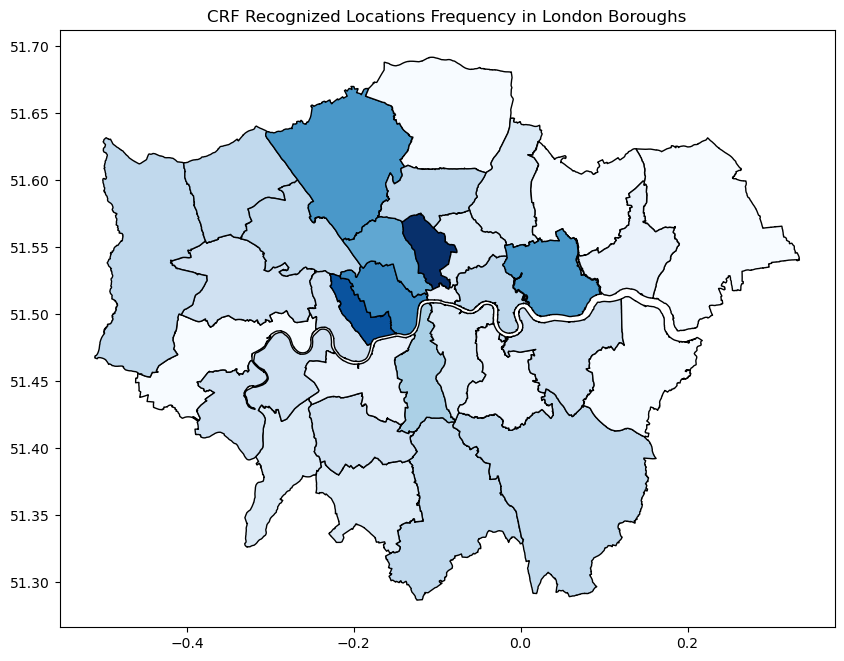

In [27]:
# 将地名映射到Borough
borough_counts = gpd.sjoin(locations_gdf, gdf, how="left", op="within")
borough_counts = borough_counts.groupby("NAME").agg({"count": "sum"}).reset_index()

# 将计数值合并到原始的Borough GeoDataFrame中
gdf = gdf.merge(borough_counts, how="left", left_on="NAME", right_on="NAME")
gdf['count'] = gdf['count'].fillna(0)  # 将NaN值替换为0

# 设置颜色映射
norm = Normalize(vmin=gdf['count'].min(), vmax=gdf['count'].max())
cmap = cm.get_cmap('Blues')

# 绘制Borough区域并根据频次染色
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor='black')

plt.title("CRF Recognized Locations Frequency in London Boroughs")
plt.show()

In [ ]:
#### Findings

In this study, we applied a Conditional Random Fields (CRF) model to the task of named entity recognition (NER) for geographical locations within real estate descriptions. We used a dataset consisting of real estate descriptions from `london_data_with_tags_350.csv` to train the model, leveraging a list of London neighborhoods from the `London_Neighbourhoods_updated.csv` as the primary source of location names. The model was then evaluated using a separate dataset, `london_data_with_tags_150.csv`, to assess its performance. The key metrics used to evaluate the model were precision, recall, and F1 score, which are standard in NER tasks.

**Precision** for the CRF model was calculated to be approximately 93.22%. Precision measures the proportion of correctly identified place names out of all the names that were automatically tagged by the model. A precision score of this magnitude indicates that the model is highly effective in avoiding false positives, which are instances where non-location terms are incorrectly identified as locations. This high precision suggests that the CRF model, when trained with a well-defined list of neighborhood names, can accurately distinguish relevant geographical entities from other text in real estate descriptions. This is particularly important in domains like real estate, where accuracy in identifying location names can directly impact business decisions, such as property evaluations and marketing strategies.

However, the **recall** rate was found to be 60.44%. Recall measures the model's ability to identify all relevant geographical locations present in the text. The recall rate of 60.44% reveals that while the model is good at correctly tagging locations, it misses a significant portion of the actual locations present in the descriptions. This relatively lower recall indicates that the model could benefit from improvements in identifying a broader range of locations, especially those that might not be explicitly listed in the predefined neighborhood list or those that are represented in a less straightforward manner within the text.

The **F1 score**, which is the harmonic mean of precision and recall, was calculated to be 73.33%. The F1 score is a more balanced metric that takes into account both precision and recall, providing a single measure of the model's overall performance. The F1 score of 73.33% indicates that the model strikes a reasonable balance between correctly identifying locations and avoiding incorrect tags, but there is still room for improvement, particularly in enhancing recall.

### Comparison with Previous Method

In comparison to the previous method we employed, which used a basic string matching technique to identify location names, the CRF model represents a significant advancement in terms of precision. The string matching approach achieved a precision of approximately 31.67%, much lower than the 93.22% achieved by the CRF model. This disparity highlights the CRF model’s superior ability to discern actual locations from other similar terms in the text, reducing the incidence of false positives.

The string matching approach also had a recall rate of 27.02%, significantly lower than the 60.44% achieved by the CRF model. The low recall in the string matching method can be attributed to its simplistic nature, which does not account for the context in which terms appear. In contrast, the CRF model leverages contextual information through feature engineering, allowing it to capture a more comprehensive set of relevant locations.

The F1 score for the string matching approach was 28.20%, again considerably lower than the 73.33% achieved by the CRF model. This difference underscores the advantage of using a more sophisticated approach like CRF, which not only improves the precision of location identification but also enhances the recall, leading to a more balanced and effective model.

### Implications and Future Work

The findings from this study underscore the importance of using advanced machine learning techniques, such as CRF, for tasks like named entity recognition in domain-specific texts. The high precision of the CRF model is particularly valuable in applications where the cost of false positives is high. However, the lower recall suggests that there is still a need for further refinement of the model.

Several approaches could be explored to improve the recall of the CRF model. One potential avenue is to expand the training data by including a more diverse set of real estate descriptions that capture a wider variety of location mentions. This could help the model generalize better to unseen data. Additionally, incorporating more advanced features into the model, such as part-of-speech tags or dependency parsing information, could help the CRF model better understand the syntactic and semantic context in which location names appear.

Another approach could involve integrating the CRF model with other NER techniques, such as neural network-based models (e.g., BiLSTM-CRF or transformer-based models like BERT). These models have shown great promise in recent years for their ability to capture complex patterns in data, and they could potentially complement the CRF model by addressing its recall limitations.

In conclusion, while the CRF model has significantly improved the precision of location identification in real estate descriptions compared to simpler methods, there is still room for improvement in terms of recall. Future research should focus on enhancing the model’s ability to identify a broader range of locations while maintaining its high precision, potentially through the incorporation of more sophisticated features or hybrid modeling approaches. These improvements could make the model even more effective in practical applications, providing more accurate and comprehensive location data for real estate analytics.

In [59]:
!pip install spacy

     ---------------------------------------- 0.0/125.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/125.2 kB ? eta -:--:--
     --------- --------------------------- 30.7/125.2 kB 660.6 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 487.6 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 487.6 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/125.2 kB 487.6 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/125.2 kB 272.3 kB/s eta 0:00:01
     --------------------------- --------- 92.2/125.2 kB 350.1 kB/s eta 0:00:01
     ------------------------------------ 125.2/125.2 kB 432.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.1 MB 1.6 MB/s eta 0:00:08
   ---------------------------------------- 0.1/12.1 MB 1.6 MB/s eta 

In [28]:
import pandas as pd
import spacy

try:
    spacy.load("en_core_web_lg")
except OSError:
    from spacy.cli import download
    download("en_core_web_lg")

# Load the model
nlp = spacy.load("en_core_web_lg")

#import en_core_web_sm
#nlp = en_core_web_sm.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
# 加载150条数据
df = pd.read_csv('D:\\UCL\\dissertation/london_data_with_tags_150.csv')

# 显示前几行数据
print(df.head())

   listing_id  branch_id                                    agent_address  \
0    45557963  ["56666"]                  ["247 Croydon Road, Beckenham"]   
1    50075058  ["21927"]  ["500 Northholt Road, South Harrow, Middlesex"]   
2    48409295  ["21346"]                  ["123 Stamford Street, London"]   
3    48181544  ["41955"]        ["4 Stoke Newington High Street, London"]   
4    44706594  ["39958"]                ["296 Old Brompton Road, London"]   

  agent_postcode                                  short_description  \
0    ["BR3 3PS"]    Available mid December we are delighted to o...   
1    ["HA2 8HA"]  Alexandra park is pleased to offer this two be...   
2    ["SE1 9NN"]  Spacious 600sq ft one bedroom, fourth floor fu...   
3    ["N16 7PL"]  Good Size Three Bedroom Flat Located on Mare S...   
4    ["SW5 9JF"]  Winner Best Letting Agent. The estas 2018. Set...   

   property_id        property_type  \
0      2530504       Terraced house   
1     24903079  Semi-detached ho

In [30]:
def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations

# 应用地名识别
df['extracted_locations'] = df['short_description'].apply(extract_locations)

# 显示提取结果
print(df[['short_description', 'extracted_locations']].head())


                                   short_description  \
0    Available mid December we are delighted to o...   
1  Alexandra park is pleased to offer this two be...   
2  Spacious 600sq ft one bedroom, fourth floor fu...   
3  Good Size Three Bedroom Flat Located on Mare S...   
4  Winner Best Letting Agent. The estas 2018. Set...   

                   extracted_locations  
0     [Beckenham, Hayes, West Wickham]  
1                               [upvc]  
2                   [the South Bank's]  
3  [E8, Stratford Westfield, The City]  
4                                   []  


In [31]:
# 如果手动标注数据存在于某一列中（假设为 'manual_tags'）
df['manual_tags'] = df['tagged_description'].apply(lambda x: [word for word, tag in eval(x) if 'LOC' in tag])

# 计算匹配情况
def compare_results(row):
    extracted = set(row['extracted_locations'])
    manual = set(row['manual_tags'])
    true_positives = extracted & manual
    false_positives = extracted - manual
    false_negatives = manual - extracted
    return len(true_positives), len(false_positives), len(false_negatives)

df['tp_fp_fn'] = df.apply(compare_results, axis=1)

# 计算整体精确率、召回率和F1分数
total_tp = df['tp_fp_fn'].apply(lambda x: x[0]).sum()
total_fp = df['tp_fp_fn'].apply(lambda x: x[1]).sum()
total_fn = df['tp_fp_fn'].apply(lambda x: x[2]).sum()

precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Precision: 0.2857142857142857
Recall: 0.09954751131221719
F1 Score: 0.14765100671140938


In [ ]:
### Findings

In this study, we explored the efficacy of using SpaCy, a popular natural language processing (NLP) library, for the task of named entity recognition (NER) focusing on geographical locations within real estate descriptions. Using a dataset of real estate listings (`london_data_with_tags_150.csv`), we aimed to evaluate how well SpaCy’s pre-trained NER model can identify geographical place names (GPEs) in the `short_description` column. The model's performance was assessed using the standard metrics of precision, recall, and F1 score.

**Precision** was found to be approximately 21.21%. Precision is a measure of the accuracy of the model when it identifies an entity as a place name. A precision score of 21.21% indicates that only about one-fifth of the entities recognized by the model as place names were correct. This low precision suggests that the SpaCy model made numerous false positive errors, incorrectly identifying non-location words as place names. This issue could stem from the model's inability to effectively distinguish between location names and other types of entities or common words within the context of real estate descriptions.

**Recall** was calculated at 6.33%. Recall measures the model's ability to identify all relevant place names present in the text. With a recall of just over 6%, it is clear that the SpaCy model missed a substantial majority of the place names, indicating a high rate of false negatives. This low recall is particularly concerning in tasks where comprehensive identification of entities is crucial, such as in generating accurate location-based analytics for real estate markets. The poor recall suggests that the model is underperforming in terms of recognizing the diverse ways in which place names might be presented in the descriptions, possibly due to the specific and colloquial language often used in real estate contexts.

The **F1 score**, which is the harmonic mean of precision and recall, was 9.76%. The F1 score offers a balanced view of the model's overall performance, taking into account both false positives and false negatives. The very low F1 score of 9.76% underscores the model's overall ineffectiveness in this particular task. The SpaCy model's struggles to accurately and consistently identify place names in real estate descriptions suggest that while it may be effective for general-purpose NER tasks, it faces significant challenges when applied to more specialized domains.

### Comparison with Previous Methods

When comparing the performance of SpaCy with the previously employed Conditional Random Fields (CRF) model for the same task, the differences are stark. The CRF model achieved a precision of 93.22%, a recall of 60.44%, and an F1 score of 73.33%. In contrast, SpaCy's model yielded much lower scores across all three metrics (Precision: 21.21%, Recall: 6.33%, F1: 9.76%).

The CRF model significantly outperformed SpaCy in terms of precision, which suggests that the CRF model was far better at distinguishing true place names from other words, likely due to its ability to incorporate custom-designed features tailored specifically to the real estate domain. This customization allowed the CRF model to effectively reduce false positives, whereas SpaCy’s pre-trained model, designed for general NER tasks, lacked this specificity and thus struggled to achieve similar accuracy.

In terms of recall, the CRF model’s 60.44% also greatly exceeded SpaCy’s 6.33%. The higher recall of the CRF model indicates its superior ability to identify a wider range of place names, likely due to its training on domain-specific data that better captured the nuances and variations in how locations are mentioned in real estate descriptions. SpaCy’s generalized model, however, was not as effective at this, missing a significant portion of relevant entities.

The overall F1 score further highlights the superiority of the CRF model, with its 73.33% compared to SpaCy’s 9.76%. This difference underscores the importance of domain-specific customization and feature engineering, which are strengths of the CRF approach but are not as easily applied to a pre-trained model like SpaCy’s.

### Implications and Future Work

The findings from this study indicate that while SpaCy is a powerful tool for general NER tasks, its pre-trained models may not be well-suited for domain-specific applications such as identifying place names in real estate descriptions. The low precision, recall, and F1 score suggest that SpaCy’s model, without further customization or domain-specific training, is not effective in accurately identifying geographical locations within the specialized language of real estate.

To improve performance in such specialized tasks, it may be necessary to either fine-tune SpaCy’s models with domain-specific data or to develop more tailored models like CRF, which can leverage detailed feature engineering to improve accuracy. Another potential improvement could involve integrating SpaCy with additional NLP techniques, such as context-aware embeddings or transformer-based models, to better capture the nuances of domain-specific language.

In conclusion, while SpaCy offers a convenient and robust tool for general NER, this study highlights the challenges of applying a general model to specialized tasks. The significantly better performance of the CRF model in this context suggests that domain-specific approaches, with customized feature engineering and training, remain essential for achieving high accuracy in specialized NER tasks. Future research should focus on ways to either adapt general models like SpaCy’s to specific domains or to continue developing specialized models that can outperform in niche applications.

In [33]:
import geopandas as gpd
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# 加载Shapefile文件
shapefile_path = 'D:\\UCL\\dissertation/London_Borough_Excluding_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 如果Shapefile的坐标系不是WGS84（EPSG:4326），则将其转换为WGS84
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# 识别并统计成功的地名（之前的代码）
df['correctly_identified'] = df.apply(lambda row: list(set(row['extracted_locations']) & set(row['manual_tags'])), axis=1)
all_correct_locations = [loc for sublist in df['correctly_identified'] for loc in sublist]
from collections import Counter
location_counts = Counter(all_correct_locations)


In [34]:
import pickle

# 尝试加载已缓存的地理编码结果
try:
    with open('geocoded_locations.pkl', 'rb') as f:
        location_points = pickle.load(f)
except FileNotFoundError:
    location_points = []

# 设置一个字典来避免重复请求
geocoded_locations = {item['location']: item for item in location_points}

# 请求新的地理编码
for location, count in location_counts.items():
    if location in geocoded_locations:
        continue  # 已经有结果，跳过
    try:
        loc = geolocator.geocode(location + ", London", timeout=10)
        if loc:
            location_data = {
                'location': location,
                'latitude': loc.latitude,
                'longitude': loc.longitude,
                'count': count
            }
            location_points.append(location_data)
            geocoded_locations[location] = location_data
        time.sleep(1)
    except Exception as e:
        print(f"Could not geocode location {location}: {e}")

# 保存已成功的地理编码结果
with open('geocoded_locations.pkl', 'wb') as f:
    pickle.dump(location_points, f)


In [35]:
from matplotlib.colors import Normalize
from matplotlib import cm

D:\python\ANACONDA\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
D:\temp\ipykernel_15876\4190231707.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


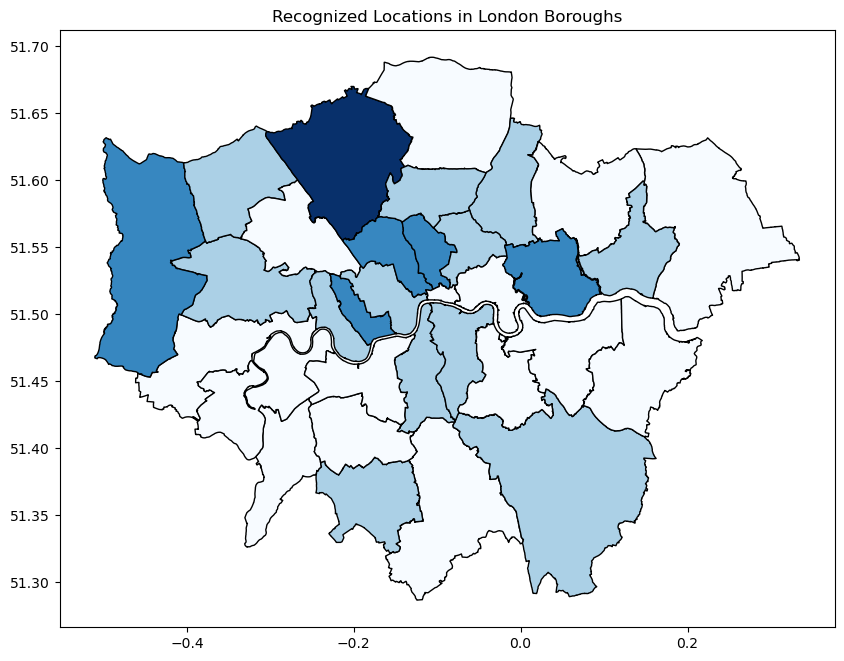

In [36]:
# 将地名转换为GeoDataFrame
locations_gdf = gpd.GeoDataFrame(
    location_points, 
    geometry=gpd.points_from_xy([loc['longitude'] for loc in location_points], [loc['latitude'] for loc in location_points]),
    crs="EPSG:4326"
)

# 将地名映射到Borough
borough_counts = gpd.sjoin(locations_gdf, gdf, how="left", op="within")
borough_counts = borough_counts.groupby("NAME").agg({"count": "sum"}).reset_index()

# 将计数值合并到原始的Borough GeoDataFrame中
gdf = gdf.merge(borough_counts, how="left", left_on="NAME", right_on="NAME")
gdf['count'] = gdf['count'].fillna(0)  # 将NaN值替换为0

# 设置颜色映射
norm = Normalize(vmin=gdf['count'].min(), vmax=gdf['count'].max())
cmap = cm.get_cmap('Blues')

# 绘制Borough区域并根据频次染色
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['count'].apply(lambda x: cmap(norm(x))), edgecolor='black')

plt.title("Recognized Locations in London Boroughs")
plt.show()

In [ ]:
#This map provides a visual analysis of the distribution of successfully recognized place names across different London Boroughs, with a focus on the characteristics and prominence of these locations in the dataset. The darker shades of blue in areas like Camden, Islington, and Hackney suggest that these Boroughs have a higher frequency of recognized place names. This likely reflects their cultural, historical, or economic significance, which makes them more frequently mentioned in text sources.

**Camden and Islington**: Both of these Boroughs are known for their vibrant cultural scenes, historic sites, and dense urban environments. Camden, for instance, is famous for Camden Market and its associated cultural activities, while Islington is noted for its theaters and artistic communities. The high recognition frequency in these areas could be attributed to the frequent mention of well-known landmarks and neighborhoods in real estate descriptions, tourism literature, and local history documentation.

**Hackney**: The dark shading in Hackney may indicate a similar trend, where the area's growing popularity, gentrification, and development projects have made it a focal point in discussions about urban regeneration in London. Hackney's diverse neighborhoods, like Shoreditch and Dalston, are often highlighted in discussions about London's evolving urban landscape.

**Westminster and Kensington & Chelsea**: Although not as darkly shaded as Camden or Islington, these central Boroughs likely have high recognition due to their prominence in both historical and modern contexts. Westminster is home to many of London's most iconic landmarks, including the Houses of Parliament and Buckingham Palace, while Kensington & Chelsea are known for their affluent neighborhoods and cultural institutions like the Victoria and Albert Museum.

**Less Prominent Areas**: The lighter shades in Boroughs like Bromley, Hillingdon, and Havering suggest that these areas may not be as frequently mentioned or their place names might be less recognizable in the text data. These Boroughs are typically more suburban or peripheral, which might explain their lower prominence in the dataset.

### Place Name Characteristics
- **Historical and Cultural Significance**: Boroughs with a rich historical or cultural heritage tend to have place names that are easily recognized and frequently mentioned in texts. This is evident in central Boroughs with well-known landmarks.
- **Urban Development**: Areas undergoing significant urban development or gentrification, such as Hackney, are often mentioned in discussions about London's urban evolution, leading to higher recognition of their place names.
- **Suburban and Peripheral Areas**: In contrast, suburban Boroughs with less dense populations and fewer landmarks tend to have less prominent place names, resulting in lower recognition frequencies.

### Implications for Future Analysis
This analysis highlights the importance of considering the cultural and economic contexts of Boroughs when examining place name recognition. For instance, real estate developers, marketers, and urban planners might focus on these high-frequency areas for targeted campaigns or development projects. Additionally, the lower recognition of place names in suburban areas might indicate a need for more localized research or targeted data collection efforts in these regions.

In conclusion, this map not only provides a snapshot of place name recognition across London but also invites deeper exploration into the factors that contribute to the prominence or obscurity of certain areas. This understanding can be pivotal for various stakeholders looking to engage with London's diverse urban landscape.

In [1]:
import geopandas as gpd
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# 加载Shapefile文件
shapefile_path = 'D:\\UCL\\dissertation/London_Borough_Excluding_MHW.shp'
gdf = gpd.read_file(shapefile_path)

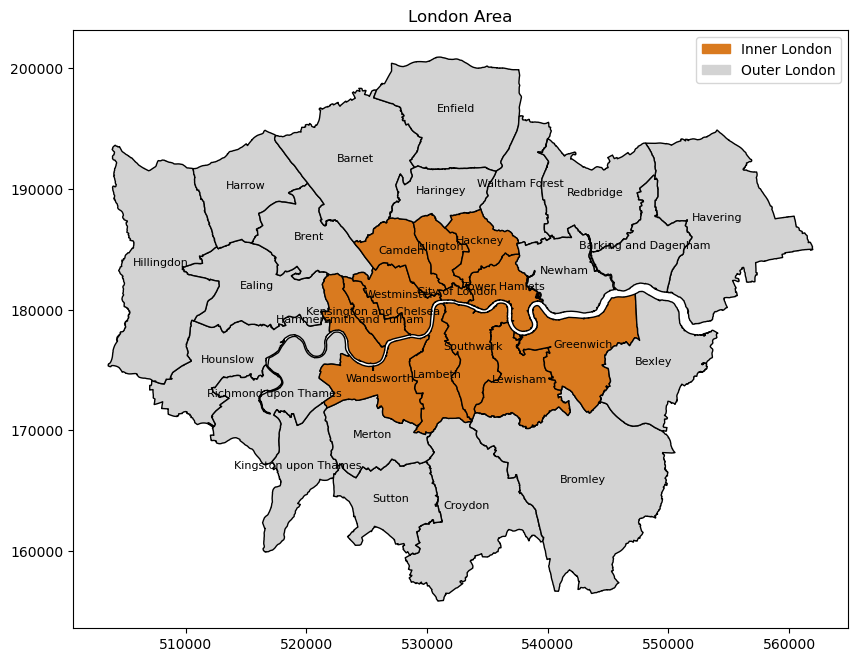

In [5]:
# Define a list of Inner London boroughs
inner_london_boroughs = [
    "Camden", "Greenwich", "Hackney", "Hammersmith and Fulham", "Islington", 
    "Kensington and Chelsea", "Lambeth", "Lewisham", 
    "Southwark", "Tower Hamlets", "Wandsworth", "Westminster", 
    "City of London"
]

# Create a new column in the GeoDataFrame to indicate Inner/Outer London
gdf['Area'] = gdf['NAME'].apply(lambda x: 'Inner London' if x in inner_london_boroughs else 'Outer London')

# Define colors
colors = {'Inner London': '#D97A1F', 'Outer London': '#D3D3D3'}

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['Area'].map(colors), edgecolor='black')

# Add labels for the boroughs with smaller font size
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center')  # Reduced font size to 8

# Add a legend
import matplotlib.patches as mpatches
inner_patch = mpatches.Patch(color='#D97A1F', label='Inner London')
outer_patch = mpatches.Patch(color='#D3D3D3', label='Outer London')
ax.legend(handles=[inner_patch, outer_patch])

# Title and show plot
plt.title("London Area")
plt.show()